# Instrucciones
El archivo _melate.csv_ contiene los datos de la bolsa acumulada del concurso Melate desde el primero de enero de 1995, concurso que se celebra todos los miércoles, viernes y domingo.  
Si un día no hubo concurso, estará marcado en el archivo como un par de comillas dobles.  
Si nadie gana el concurso, se acumulan las ganancias para el siguiente sorteo.  
Si alguien gana el sorteo, la siguiente fecha inicia con una bolsa mínima, que para sorteos seguidos suele ser la misma.

1. Importa el archivo desde [https://raw.githubusercontent.com/DRMiguelAR/Herramientas_Analisis/master/melate.csv](https://raw.githubusercontent.com/DRMiguelAR/Herramientas_Analisis/master/melate.csv)  
1. Abre el archivo y convierte la serie de datos a una Serie de pandas.
1. Genera una serie con todos lo miércoles, viernes y domingos a partir del primero de enero de 1995 hasta el 28 de septiembre de 2022.  
1. Agrega esta serie de fechas como índice a las bolsas del melate.
1. Encuentra cuántos valores vacíos y cuantos valores válidos tiene la serie.
1. Filtra los valores vacíos de la serie, para sólo quedarte con los valores válidos
1. Encuentra algunas estadísticas de la serie, para cada una, genera un campo en el que describas qué significa el resultado obtenido.

>> count, min, max, argmin, argmax, idxmin, idxmax, quantile, sum, mean, median, mode, var, std, skew, kurt, cumsum, cummin, cummax, diff, pct_change, histogram, describe

8. Contesta las siguientes preguntas:  
    a. ¿Cuál es la mayor cantidad de sorteos que han pasado sin obtener un ganador?  
    a. ¿Cuál es la vez en que ha habido ganadores de melate más próximos?


2. Abre el archivo y convierte la serie de datos a una Serie de pandas.

In [70]:
import os
import pandas as pd

file_path = os.getcwd()
folder_path = '\\datasets\\melate.csv'
df = pd.read_csv(file_path + folder_path, names=['Amount'])
print(df.shape, '\n', df.info())
print(df)
data = df['Amount']
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4343 entries, 0 to 4342
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Amount  2906 non-null   float64
dtypes: float64(1)
memory usage: 34.1 KB
(4343, 1) 
 None
        Amount
0      3000000
1      3800000
2          NaN
3      2000000
4      2200000
...        ...
4338 358900000
4339 361000000
4340 365000000
4341 368800000
4342 371600000

[4343 rows x 1 columns]


0        3000000
1        3800000
2            NaN
3        2000000
4        2200000
          ...   
4338   358900000
4339   361000000
4340   365000000
4341   368800000
4342   371600000
Name: Amount, Length: 4343, dtype: float64

3. Genera una serie con todos lo miércoles, viernes y domingos a partir del primero de enero de 1995 hasta el 28 de septiembre de 2022.

In [71]:
date_range = pd.date_range(start='1995-01-01', end='2022-09-28')
filtered_dates = date_range[date_range.weekday.isin([2, 4, 6])]
date_series = pd.Series(filtered_dates)
date_series

0      1995-01-01
1      1995-01-04
2      1995-01-06
3      1995-01-08
4      1995-01-11
          ...    
4338   2022-09-18
4339   2022-09-21
4340   2022-09-23
4341   2022-09-25
4342   2022-09-28
Length: 4343, dtype: datetime64[ns]

4. Agrega esta serie de fechas como índice a las bolsas del melate.

In [72]:
data = data.set_axis(date_series)
data

1995-01-01     3000000
1995-01-04     3800000
1995-01-06         NaN
1995-01-08     2000000
1995-01-11     2200000
                ...   
2022-09-18   358900000
2022-09-21   361000000
2022-09-23   365000000
2022-09-25   368800000
2022-09-28   371600000
Name: Amount, Length: 4343, dtype: float64

5. Encuentra cuántos valores vacíos y cuantos valores válidos tiene la serie.

In [73]:
data.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 4343 entries, 1995-01-01 to 2022-09-28
Series name: Amount
Non-Null Count  Dtype  
--------------  -----  
2906 non-null   float64
dtypes: float64(1)
memory usage: 67.9 KB


> Tiene 4343 elementos, de los cuales 2906 no son NaN, 1437 sí lo son

6. Filtra los valores vacíos de la serie, para sólo quedarte con los valores válidos

In [74]:
data = data.dropna()
data

1995-01-01     3000000
1995-01-04     3800000
1995-01-08     2000000
1995-01-11     2200000
1995-01-15     2500000
                ...   
2022-09-18   358900000
2022-09-21   361000000
2022-09-23   365000000
2022-09-25   368800000
2022-09-28   371600000
Name: Amount, Length: 2906, dtype: float64

7. Encuentra algunas estadísticas de la serie, para cada una, genera un campo en el que describas qué significa el resultado obtenido.

> count, min, max, argmin, argmax, idxmin, idxmax, quantile, sum, mean, median, mode, var, std, skew, kurt, cumsum, cummin, cummax, diff, pct_change, histogram, describe

In [75]:
pd.set_option('display.float_format', '{:.0f}'.format)
data.describe()

count        2906
mean     80041195
std     103340273
min             0
25%      13000000
50%      34000000
75%     106000000
max     639500000
Name: Amount, dtype: float64

*A partir de esta descripción podemos afirmar que la bolsa solo ha tenido menos de **13,00,000** MXN25% de las veces registradas, y el 75% de las veces ha tenido al menos **106,000,000** MXN*

In [76]:
print(data.max(), data.idxmax())
print(data.min(), data.idxmin())

639500000.0 2013-07-31 00:00:00
0.0 2006-12-27 00:00:00


*También podemos decir que el valor máximo de MXN en la bolsa de Melate ha sido de **639,500,000** MXN el **2013-07-31**, el mínimo historico fue de **0** MXN en **2006-12-27** *

In [77]:
data.sum()

232599713000.0

*A lo largo de la historia de Melate, la bolsa ha acumulado un total de **232,599,713,000** MXN*

In [78]:
print(data.mean())
print(data.var(), data.std())

80041195.11355816
1.0679212027049354e+16 103340273.01613517


*Pero el promedio ha sido de **80,041,195** MXN con una desviacion estándar de **103,340,273** MXN y una varianza de **1.06792x10<sup>16</sup>***

In [79]:
data.skew()

2.248005005008525

 *Ya que el coeficiente de asimetría es mayor a cero, podemos esperar que la mayoría de los datos se agrupan a la izquierda de la media con la **posible** excepcion de unos cuantos valores de gran magnitud que se encuentran a la derecha de la misma*

In [80]:
data.kurt()

5.6129044562436565

*El valor de curtosis de la distribución de datos nos indica que esta es **leptocúrtica**; es decir, vamos a ver un mayor concentración de valores lejos de la media, tendremos una distribución mas 'picuda'*

In [81]:
data.diff()

1995-01-01        NaN
1995-01-04     800000
1995-01-08   -1800000
1995-01-11     200000
1995-01-15     300000
               ...   
2022-09-18    4200000
2022-09-21    2100000
2022-09-23    4000000
2022-09-25    3800000
2022-09-28    2800000
Name: Amount, Length: 2906, dtype: float64

In [82]:
print(data.diff().mean(), data.diff().min(), data.diff().max())

126884.68158347676 -609500000.0 236000000.0


*Como podemos ver en los datos estadisticos obtenidos de la serie de diferencias entre valores consecutivos, la media de incremento en el valor de la bolsa de Melate es de **1236,885** MXN cada nuevo sorteo, con los extremos casos historicos de la diferencia máxima de **236,000,000** MXN y la 'perdida' máxima de **-609,500,000** MXN*

<Axes: >

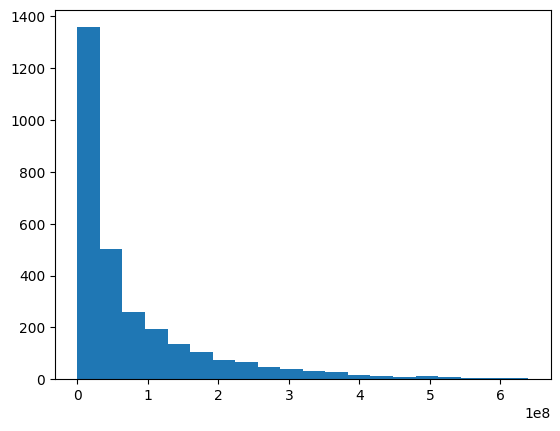

In [83]:
data.hist(grid=False, bins=20)

*Aquí podemos ver gráficamente la distribución de los datos y comprobamos todas las características que pudimos deducir a partir de los análisis anteriores*

8. Contesta las siguientes preguntas:  
    a. ¿Cuál es la mayor cantidad de sorteos que han pasado sin obtener un ganador?

In [84]:
sin_ganador = df['Amount'].diff()[df['Amount'].diff()>0] # Serie con solo los sorteos sin ganadores
idx_sin_ganador = pd.Series(sin_ganador.index) # índices de los sorteos sin ganador
sorteos_sin_ganador = idx_sin_ganador.diff() # número de sorteos sin ganar entre sorteos ganados
print(f"La mayor cantidad de torneos sin ganar ha sido {sorteos_sin_ganador.max()}")

La mayor cantidad de torneos sin ganar ha sido 51.0


1. Contesta las siguientes preguntas:  
    b. ¿Cuál es la vez en que ha habido ganadores de melate más próximos?

In [85]:
con_ganador = df['Amount'].diff()[df['Amount'].diff()<=0] # Serie con solo los sorteos con ganadores
idx_con_ganador = pd.Series(con_ganador.index) # índices de los sorteos con ganador
sorteos_con_ganador = idx_con_ganador.diff() # número de sorteos con ganador entre sorteos sin ganar
print(f"Ha habido ganadores de melate separados por {sorteos_con_ganador.min()} sorteos")

Ha habido ganadores de melate separados por 3.0 sorteos
